In [1]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train_dir = pathlib.Path('train')
test_dir = pathlib.Path('test')

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=None,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2100 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 2 classes.


In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=8
)

Epoch 1/8


66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 338ms/step - accuracy: 0.6858 - loss: 19.8704 - val_accuracy: 0.8067 - val_loss: 0.4438
Epoch 2/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - accuracy: 0.8652 - loss: 0.3019 - val_accuracy: 0.8978 - val_loss: 0.2696
Epoch 3/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.9577 - loss: 0.1350 - val_accuracy: 0.9444 - val_loss: 0.1739
Epoch 4/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 337ms/step - accuracy: 0.9880 - loss: 0.0486 - val_accuracy: 0.9389 - val_loss: 0.2340
Epoch 5/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9322 - val_loss: 0.2662
Epoch 6/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - accuracy: 0.9948 - loss: 0.0214 - val_accuracy: 0.9422 - val_loss: 0.2269
Epoch 7/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9667 - val_loss: 0.1766
Epoch 8/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9689 - va

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 255)            │     3,264,255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,852,479 (37.58 MB)

 Trainable params: 3,284,159 (12.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,568,320 (25.06 MB)

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()  
    except:
      pass

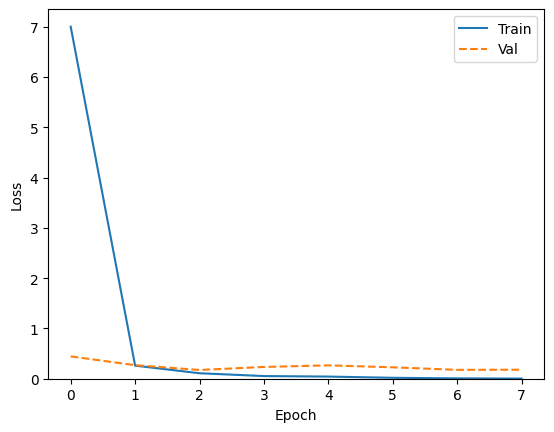

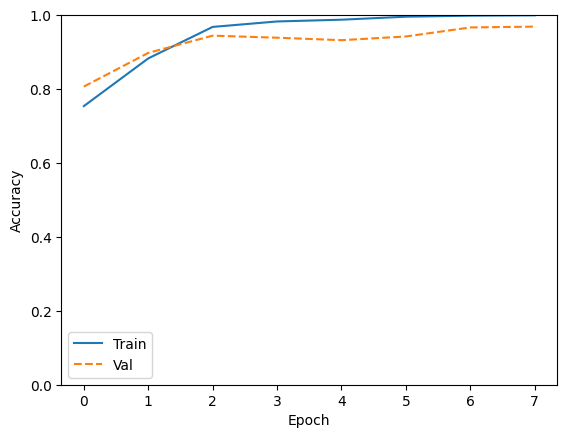

In [ ]:
plot_metrics(hist)